In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [2]:
df_sales = pd.read_excel('IVY DATA Normalized.xlsx',encoding='latin1')
df_sales.head()

,S.No,Order No.,date,Company,Cuid,Customer,Employee,sales,Discount,Total,Order Type,View,Month
0,8179,115047,2019-01-01 10:06:35,Treet,6014,Hafeez Gen Store,Asad Bokhari,406.0008,0,406.0008,DELIVERED,View,Jan
1,6688,115653,2019-01-01 10:25:15,Treet,5680,Javaid Pan Shop,Mohd. Umer,826.9992,0,826.9992,DELIVERED,View,Jan
2,1412,115529,2019-01-01 10:25:54,Treet,4628,M.A Karyana @ Nishat Colony,Asif Mannan,52.7082,0 0,52.7082,DELIVERED,View,Jan
3,1413,115530,2019-01-01 10:26:23,Treet,4629,Subhan Store @ Nishat Colony,Asif Mannan,101.5002,0 0,101.5002,DELIVERED,View,Jan
4,1414,115531,2019-01-01 10:26:41,Treet,4626,Hafiz cold corner,Asif Mannan,203.0004,0 0,203.0004,DELIVERED,View,Jan


In [41]:
df_sales['date'] = pd.to_datetime(df_sales['date'])


In [42]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114594 entries, 0 to 114593
Data columns (total 13 columns):
S.No          114594 non-null int64
Order No.     114594 non-null int64
date          114594 non-null datetime64[ns]
Company       114594 non-null object
Cuid          114594 non-null int64
Customer      114594 non-null object
Employee      114594 non-null object
sales         114594 non-null float64
Discount      114594 non-null object
Total         114594 non-null float64
Order Type    114594 non-null object
View          114594 non-null object
Jan           114594 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 11.4+ MB


In [43]:
#represent month in date field as its first day
df_sales['date'] = df_sales['date'].dt.year.astype('str') + '-' + df_sales['date'].dt.month.astype('str') + '-01'
df_sales['date'] = pd.to_datetime(df_sales['date'])
#groupby date and sum the sales
df_sales = df_sales.groupby('date').sales.sum().reset_index()

In [44]:
df_sales.head(10)

,date,sales
0,2019-01-01,3.226457e+07
1,2019-02-01,3.695194e+07
2,2019-03-01,4.734573e+07
3,2019-04-01,5.673096e+07
4,2019-05-01,5.446550e+07
5,2019-06-01,5.802369e+07
6,2019-07-01,5.977290e+07
7,2019-08-01,3.729256e+07
8,2019-09-01,6.196327e+07
9,2019-10-01,4.340407e+07


In [45]:
#plot monthly sales
plot_data = [
    go.Scatter(
        x=df_sales['date'],
        y=df_sales['sales'],
    )
]
plot_layout = go.Layout(
        title='Monthly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [46]:
df_sales.columns

Index(['date', 'sales'], dtype='object')

In [47]:
df_sales = df_sales.set_index('date')
df_sales.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [48]:
y = df_sales['sales'].resample('MS').mean()
y.head()

date
2019-01-01    3.226457e+07
2019-02-01    3.695194e+07
2019-03-01    4.734573e+07
2019-04-01    5.673096e+07
2019-05-01    5.446550e+07
Freq: MS, Name: sales, dtype: float64

In [56]:
y['2019':]

date
2019-01-01    3.226457e+07
2019-02-01    3.695194e+07
2019-03-01    4.734573e+07
2019-04-01    5.673096e+07
2019-05-01    5.446550e+07
2019-06-01    5.802369e+07
2019-07-01    5.977290e+07
2019-08-01    3.729256e+07
2019-09-01    6.196327e+07
2019-10-01    4.340407e+07
2019-11-01    4.576599e+07
2019-12-01    3.172031e+07
Freq: MS, Name: sales, dtype: float64

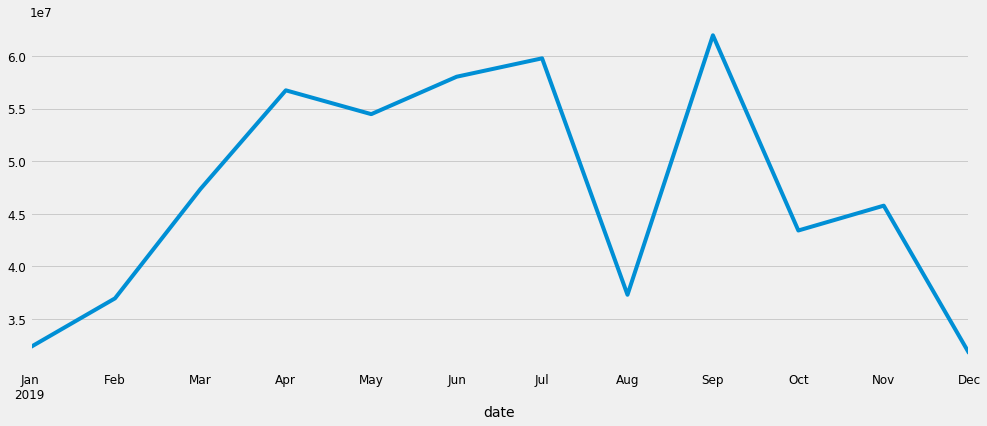

In [50]:
y.plot(figsize=(15, 6))
plt.show()

In [57]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()
# plt.show()

In [58]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [59]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
   
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:423.0121305089482
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:380.34702607027737
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:359.1985798755195
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:323.20912829447633
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:395.62548686613934
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:360.698624121252
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:357.2438292968769
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:323.4959382122643


C:\Users\Zafar Iqbal\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [61]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6881      0.472     -1.457      0.145      -1.614       0.237
ma.L1          0.0926      0.534      0.173      0.862      -0.953       1.139
sigma2      1.152e+14   1.71e-16   6.74e+29      0.000    1.15e+14    1.15e+14


ValueError: operands could not be broadcast together with shapes (9,) (7,) (9,) 

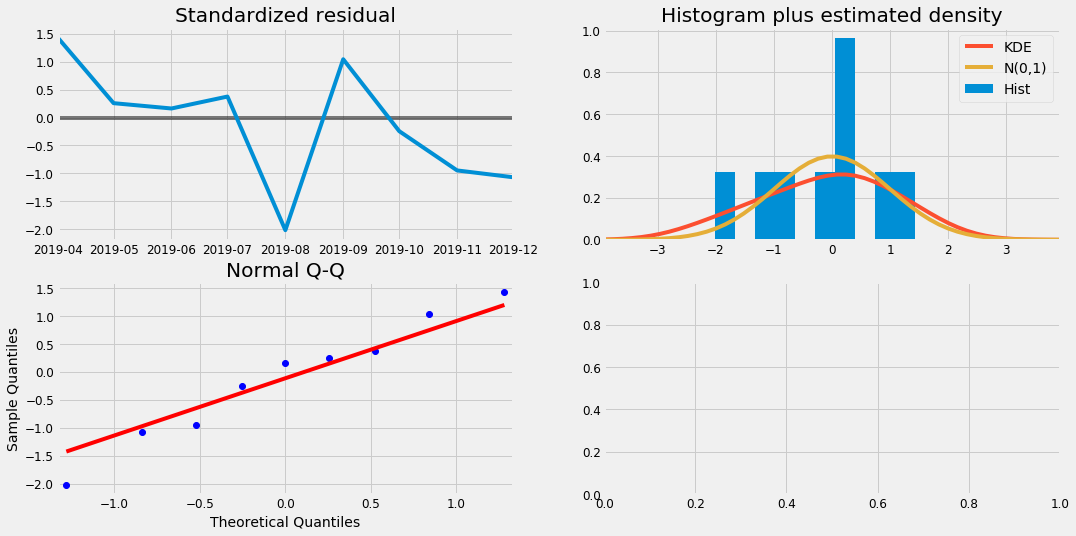

In [62]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

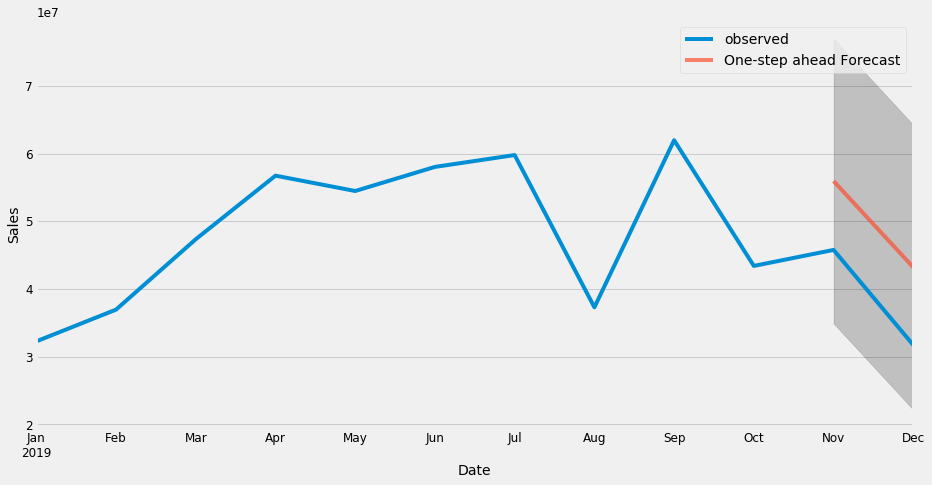

In [68]:
pred = results.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [70]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-11-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 117572003932990.22


In [71]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 10843062.48


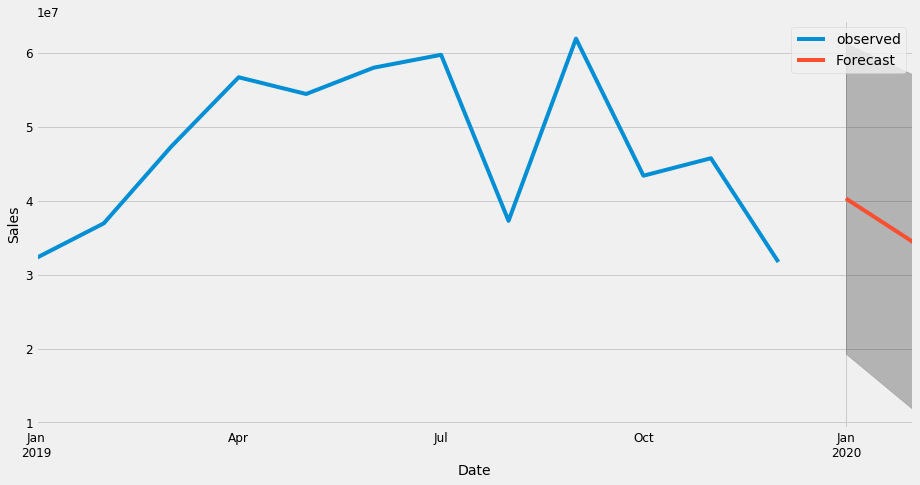

In [84]:
pred_uc = results.get_forecast(steps=2)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()